# Benchmarking the Hafnian
This tutorial shows how to use Hafnian, a C (masquerading as Python) library to calculate the Hafnian.

### The Hafnian
The hafnian of an $n$-by-$n$ symmetric matrix $A = A^T$ is defined as

\begin{align}\label{eq:hafA}
\text{haf}(A) = \sum_{M \in \text{PMP}(n)} \prod_{\scriptscriptstyle (i, j) \in M} A_{i, j}
% = \sum_{\mu \in \text{PMP}(n)} \prod_{j=1}^n A_{\mu(2j-1),\mu(2j)}
\end{align}
where PMP$(n)$ stands for the set of perfect matching permutations of $n$ (even) objects. 



### Using the library

Import the library in the usual way:

In [1]:
from hafnian import hafnian

To use it  we need to pass square numpy arrays as arguments, thus we also must import NumPy:

In [2]:
import numpy as np

The library provides functions to compute hafnians of real and complex matrices. The functions arguments must be passed as the NumPy arrays or matrices.

In [3]:
size = 10
nth = 4
matrix = np.ones([size,size])
hafnian(matrix)

945.0000000000427

In [4]:
size = 10
nth = 4
matrix = 1j*np.ones([size,size])
hafnian(matrix)

(6.5888617468912e-11+944.9999999999968j)

Not surprisingly, the hafnian of a matrix containing only ones is given by $(n-1)!! = \frac{n!}{(n/2)! 2^{n/2}}$

In [5]:
from math import factorial
factorial(size)/(factorial(size//2)*2**(size//2))

945.0

Note that when doing floating point computations with large numbers, precision can be lost.

### Benchmarking the performance of the code

For sizes $n=2,30$ we will generate random symmetric matrices and measure the (average) amount of time it takes to calculate their hafnian. The number of samples for each will be geometrically distributed, with 1000 samples for size $n=2$ and 10 samples for $n=30$. The unitaries will be random Haar distributed.

In [6]:
a0 = 1000.
anm1 = 2.
n = 20
r = (anm1/a0)**(1./(n-1))
nreps = [(int)(a0*(r**((i)))) for i in range(n)]

In [7]:
nreps

[1000,
 721,
 519,
 374,
 270,
 194,
 140,
 101,
 73,
 52,
 37,
 27,
 19,
 14,
 10,
 7,
 5,
 3,
 2,
 2]

The following function generates random Haar unitaries of dimensions $n$

In [8]:
from scipy import diagonal, randn
from scipy.linalg import qr
def haar_measure(n):
    '''A Random matrix distributed with Haar measure
    See https://arxiv.org/abs/math-ph/0609050
    How to generate random matrices from the classical compact groups
    by Francesco Mezzadri '''
    z = (randn(n,n) + 1j*randn(n,n))/np.sqrt(2.0)
    q,r = qr(z)
    d = diagonal(r)
    ph = d/np.abs(d)
    q = np.multiply(q,ph,q)
    return q

Now let's benchmark the scaling of the calculation with the matrix size

In [13]:
import time
times = np.empty(n)
for ind,reps in enumerate(nreps):
    start = time.time()
    for i in range(reps):
        size = 2*(ind+1)
        nth = 1
        matrix = haar_measure(size)
        A = matrix @ matrix.T
        A = 0.5*(A+A.T)
        res = hafnian(A)
    end = time.time()
    times[ind] = (end - start)/reps
    print(2*(ind+1), times[ind])

2 0.00023733234405517577
4 0.0003898074326005954
6 0.0005447915064346813
8 0.00046417611168030114
10 0.0010115535170943648
12 0.001820592536139734
14 0.0031131046158926826
16 0.01897731393870741
18 0.035656063524011065
20 0.0786897219144381
22 0.11523576040525695
24 0.20640154238100406
26 0.41349315643310547
28 0.894156779561724
30 2.0350144147872924
32 4.544636079243252
34 10.250679206848144
36 23.105360349019367
38 50.57243990898132
40 113.49874126911163


We can now plot the (average) time it takes to calculate the hafnian vs. the size of the matrix:

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

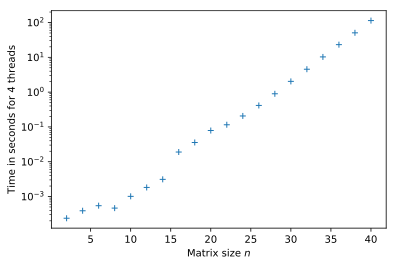

In [15]:
plt.semilogy(2*np.arange(1,n+1),times,"+")
plt.xlabel(r"Matrix size $n$")
plt.ylabel(r"Time in seconds for 4 threads")

The specs of the computer on which this benchmark was performed are:

In [16]:
!cat /proc/cpuinfo|head -19 

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 21
model		: 101
model name	: AMD A12-9800 RADEON R7, 12 COMPUTE CORES 4C+8G
stepping	: 1
microcode	: 0x6006118
cpu MHz		: 3771.211
cache size	: 1024 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 16
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes


If you use this library in your research please cite it:

In [17]:
!cat hafnian.bib

@ARTICLE{2018arXiv180512498B,
   author = {{Bj{\"o}rklund}, A. and {Gupt}, B. and {Quesada}, N.},
   title = "{A faster hafnian formula for complex matrices and its benchmarking on the Titan supercomputer}",
   journal = {ArXiv e-prints},
   archivePrefix = "arXiv",
   eprint = {1805.12498},
   primaryClass = "cs.DS",
   keywords = {Computer Science - Data Structures and Algorithms},
   year = 2018
}

